In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import skmob    # scikit mobility library



In [2]:
df =  pd.read_csv("go_track_trackspoints.csv")

df.rename(columns = {'track_id':'uid'}, inplace = True)
df.rename(columns = {'latitude':'lat'}, inplace = True)
df.rename(columns = {'longitude':'lng'}, inplace = True)
df.rename(columns = {'time':'datetime'}, inplace = True)
df

,id,lat,lng,uid,datetime
0,1,-10.939341,-37.062742,1,2014-09-13 07:24:32
1,2,-10.939341,-37.062742,1,2014-09-13 07:24:37
2,3,-10.939324,-37.062765,1,2014-09-13 07:24:42
3,4,-10.939211,-37.062843,1,2014-09-13 07:24:47
4,5,-10.938939,-37.062879,1,2014-09-13 07:24:53
...,...,...,...,...,...
18102,19565,-10.923722,-37.106579,38092,2016-01-19 13:01:01
18103,19566,-10.923704,-37.106693,38092,2016-01-19 13:01:12
18104,19567,-10.923715,-37.106688,38092,2016-01-19 13:01:24
18105,19568,-10.923715,-37.106688,38092,2016-01-19 13:01:36


In [3]:
tdf = skmob.TrajDataFrame.from_file('go_track_trackspoints.csv', latitude='latitude', longitude='longitude', user_id='track_id', datetime='time')

#tdf1 = skmob.TrajDataFrame.from_file('go_track_tracks.csv', latitude='latitude', longitude='longitude', user_id='track_id', datetime='time')
tdfn = skmob.TrajDataFrame.from_file('noisy_data.csv', latitude='latitude', longitude='longitude', user_id='track_id', datetime='time')

tdfcom= skmob.TrajDataFrame.from_file('compressed_data.csv', latitude='latitude', longitude='longitude', user_id='track_id', datetime='time')

In [4]:
tdf

,id,lat,lng,uid,datetime
0,1,-10.939341,-37.062742,1,2014-09-13 07:24:32
1,2,-10.939341,-37.062742,1,2014-09-13 07:24:37
2,3,-10.939324,-37.062765,1,2014-09-13 07:24:42
3,4,-10.939211,-37.062843,1,2014-09-13 07:24:47
4,5,-10.938939,-37.062879,1,2014-09-13 07:24:53
...,...,...,...,...,...
18102,19565,-10.923722,-37.106579,38092,2016-01-19 13:01:01
18103,19566,-10.923704,-37.106693,38092,2016-01-19 13:01:12
18104,19567,-10.923715,-37.106688,38092,2016-01-19 13:01:24
18105,19568,-10.923715,-37.106688,38092,2016-01-19 13:01:36


In [5]:
tdf.head()

,id,lat,lng,uid,datetime
0,1,-10.939341,-37.062742,1,2014-09-13 07:24:32
1,2,-10.939341,-37.062742,1,2014-09-13 07:24:37
2,3,-10.939324,-37.062765,1,2014-09-13 07:24:42
3,4,-10.939211,-37.062843,1,2014-09-13 07:24:47
4,5,-10.938939,-37.062879,1,2014-09-13 07:24:53


In [6]:
print('# users: %s' %len(tdf.uid.unique()))
print('# points: %s' %len(tdf))

# users: 163
# points: 18107


In [7]:
tdf.tail(10)

,id,lat,lng,uid,datetime
18097,19559,-10.933398,-37.078873,38084,2015-12-16 21:43:28
18098,19560,-10.933398,-37.078873,38084,2015-12-16 21:43:39
18099,19561,-10.933398,-37.078873,38084,2015-12-16 21:43:50
18100,19563,-10.869450,-37.095276,38090,2016-01-03 00:58:12
18101,19564,-10.869450,-37.095276,38090,2016-01-03 00:58:23
18102,19565,-10.923722,-37.106579,38092,2016-01-19 13:01:01
18103,19566,-10.923704,-37.106693,38092,2016-01-19 13:01:12
18104,19567,-10.923715,-37.106688,38092,2016-01-19 13:01:24
18105,19568,-10.923715,-37.106688,38092,2016-01-19 13:01:36
18106,19569,-10.923716,-37.106688,38092,2016-01-19 13:01:47


In [8]:
df.describe()

,id,lat,lng,uid
count,18107.000000,18107.000000,18107.000000,18107.000000
mean,9958.405920,-10.998744,-37.111923,13296.340697
std,5748.673657,1.329848,0.938015,18040.767448
min,1.000000,-27.603175,-48.632918,1.000000
25%,4736.500000,-10.944041,-37.073069,33.000000
50%,10376.000000,-10.922000,-37.057784,136.000000
75%,15004.500000,-10.904268,-37.050190,37992.000000
max,19569.000000,-10.292845,-36.493357,38092.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18107 entries, 0 to 18106
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        18107 non-null  int64  
 1   lat       18107 non-null  float64
 2   lng       18107 non-null  float64
 3   uid       18107 non-null  int64  
 4   datetime  18107 non-null  object 
dtypes: float64(2), int64(2), object(1)
memory usage: 707.4+ KB


In [10]:
df.isnull().sum()

id          0
lat         0
lng         0
uid         0
datetime    0
dtype: int64

In [11]:
df.shape

(18107, 5)

In [12]:
df.count()

id          18107
lat         18107
lng         18107
uid         18107
datetime    18107
dtype: int64

In [13]:
df.isnull()

,id,lat,lng,uid,datetime
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
18102,False,False,False,False,False
18103,False,False,False,False,False
18104,False,False,False,False,False
18105,False,False,False,False,False


In [14]:
 df.dtypes

id            int64
lat         float64
lng         float64
uid           int64
datetime     object
dtype: object

In [15]:
df.value_counts()

id     lat         lng         uid    datetime           
1      -10.939341  -37.062742  1      2014-09-13 07:24:32    1
13465  -10.918483  -37.063095  37953  2015-05-14 10:13:18    1
13471  -10.918656  -37.068525  37953  2015-05-14 10:15:19    1
13470  -10.918657  -37.068528  37953  2015-05-14 10:15:08    1
13469  -10.918659  -37.068533  37953  2015-05-14 10:14:57    1
                                                            ..
6252   -10.985515  -37.055915  42     2014-11-29 08:16:15    1
6253   -10.985179  -37.055479  42     2014-11-29 08:16:21    1
6254   -10.984767  -37.054996  42     2014-11-29 08:16:27    1
6255   -10.984400  -37.054652  42     2014-11-29 08:16:33    1
19569  -10.923716  -37.106688  38092  2016-01-19 13:01:47    1
Length: 18107, dtype: int64

<AxesSubplot:>

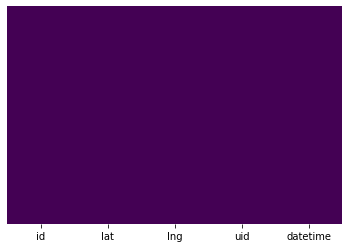

In [16]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') # No Null Values in Dataset

<AxesSubplot:xlabel='uid', ylabel='count'>

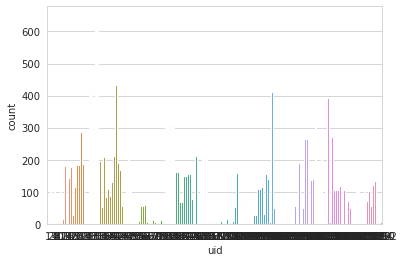

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='uid',data = df)

In [18]:
df.columns

Index(['id', 'lat', 'lng', 'uid', 'datetime'], dtype='object')

In [19]:
tdf.plot_trajectory(zoom=12, weight=3, opacity=0.9, tiles='Stamen Toner')

/home/avneeshrathore/anaconda3/lib/python3.9/site-packages/skmob/core/trajectorydataframe.py:569: UserWarning: Only the trajectories of the first 10 users will be plotted. Use the argument `max_users` to specify the desired number of users, or filter the TrajDataFrame.
  return plot.plot_trajectory(self, map_f=map_f, max_users=max_users, max_points=max_points, style_function=style_function,
/home/avneeshrathore/anaconda3/lib/python3.9/site-packages/skmob/core/trajectorydataframe.py:569: UserWarning: If necessary, trajectories will be down-sampled to have at most `max_points` points. To avoid this, specify `max_points=None`.
  return plot.plot_trajectory(self, map_f=map_f, max_users=max_users, max_points=max_points, style_function=style_function,


In [20]:
tdfn.plot_trajectory(zoom=12, weight=3, opacity=0.9, tiles='Stamen Toner')

In [90]:
# selecting single user from trajectory data frame 
user1_tdf = tdf[tdf.uid == 208]
print(len(tdf['uid'].unique()))
user1_tdfn = tdfn[tdfn.uid == 208]

user1_tdf.head(20)

163


,id,lat,lng,uid,datetime
11401,12797,-10.896882,-37.053400,208,2015-04-24 10:39:06
11402,12798,-10.896895,-37.053330,208,2015-04-24 10:39:11
11403,12799,-10.896880,-37.053332,208,2015-04-24 10:39:18
11404,12800,-10.896880,-37.053335,208,2015-04-24 10:39:23
11405,12801,-10.896881,-37.053335,208,2015-04-24 10:39:28
11406,12802,-10.896881,-37.053335,208,2015-04-24 10:39:34
11407,12803,-10.896880,-37.053336,208,2015-04-24 10:39:48
11408,12804,-10.896880,-37.053336,208,2015-04-24 10:39:53
11409,12805,-10.896880,-37.053336,208,2015-04-24 10:40:01
11410,12806,-10.896880,-37.053337,208,2015-04-24 10:40:09


In [91]:
print('# users: %s' %len(tdf.uid.unique()))
print('# points: %s' %len(tdf))
print('time window: %s' 
      %(tdf.iloc[-1].datetime - tdf.iloc[0].datetime))

# users: 163
# points: 18107
time window: 493 days 05:37:15


In [92]:
user1_map = user1_tdf.plot_trajectory(zoom=11, weight=3, hex_color='black',
                                      tiles='Open Street Map')
user1_map

/home/avneeshrathore/anaconda3/lib/python3.9/site-packages/skmob/core/trajectorydataframe.py:569: UserWarning: Only the trajectories of the first 10 users will be plotted. Use the argument `max_users` to specify the desired number of users, or filter the TrajDataFrame.
  return plot.plot_trajectory(self, map_f=map_f, max_users=max_users, max_points=max_points, style_function=style_function,
/home/avneeshrathore/anaconda3/lib/python3.9/site-packages/skmob/core/trajectorydataframe.py:569: UserWarning: If necessary, trajectories will be down-sampled to have at most `max_points` points. To avoid this, specify `max_points=None`.
  return plot.plot_trajectory(self, map_f=map_f, max_users=max_users, max_points=max_points, style_function=style_function,


In [93]:
user1_mapn = user1_tdfn.plot_trajectory(zoom=11, weight=3, hex_color='black',
                                      tiles='Open Street Map')
user1_mapn

# Preproccessing 

# 1 . Noise filtering
Filter out points with speed higher than max_speed km/h from the previous point.

In [94]:
from skmob.preprocessing import filtering

In [95]:
ftdf = filtering.filter(tdf, max_speed_kmh=170)
print(ftdf.parameters)

{'from_file': 'go_track_trackspoints.csv', 'filter': {'function': 'filter', 'max_speed_kmh': 170, 'include_loops': False, 'speed_kmh': 5.0, 'max_loop': 6, 'ratio_max': 0.25}}


In [96]:
n_deleted_points = len(tdf) - len(ftdf) # number of deleted points in original points
print(n_deleted_points)

15


In [97]:
ftdfn = filtering.filter(tdfn, max_speed_kmh=170)
print(ftdfn.parameters)

{'from_file': 'noisy_data.csv', 'filter': {'function': 'filter', 'max_speed_kmh': 170, 'include_loops': False, 'speed_kmh': 5.0, 'max_loop': 6, 'ratio_max': 0.25}}


In [98]:
n_deleted_points = len(tdfn) - len(ftdfn) # number of deleted points in noisy data 
print(n_deleted_points)

20


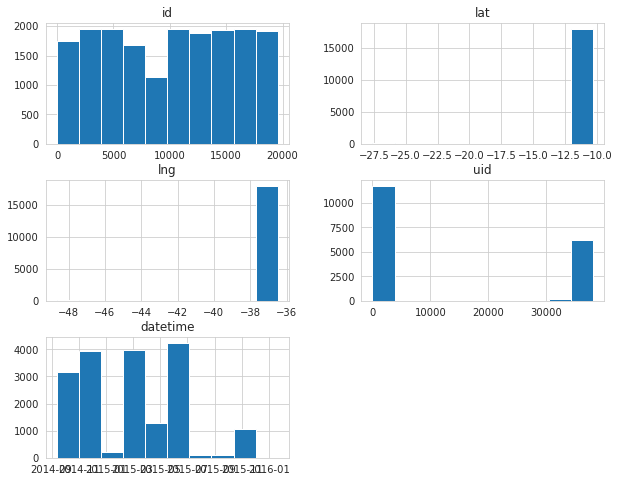

In [30]:
tdf.hist(figsize=(10,8))
plt.show()

In [112]:
from haversine import haversine
!pip install ordered-set
from ordered_set import OrderedSet
import sys
from collections import deque

In [115]:
def SmartFilter(tt, size, thres):
    
    tp = pd.DataFrame(tt)
    t = tp.to_numpy()
    q = deque()
    ts, waste = t.shape
    latSum = 0
    lngSum = 0
    ws = 0
    prev_speed = 0;
    lat = OrderedSet()
    lng = OrderedSet()
    cnt = 0
    
    for i in range(1,ts-1):
        
        if ws > size:
            ws -= 1
            ind = q.popleft()
            latSum -= t[ind][1]
            lngSum -= t[ind][2]
            lat.remove((t[ind][1], ind))
            lng.remove((t[ind][2], ind))
        
        dist = haversine((t[i][1], t[i][2]), (t[i-1][1], t[i-1][2])) * 1000
        time = (t[i][4] - t[i-1][4]).total_seconds()
        speed = dist/time
        acc = abs(speed-prev_speed) / time
        
        
        if acc > thres:
            
            if acc > 2*thres:
                medLat, j = lat[ws//2]
                medLng, j = lng[ws//2]
                t[i][1] = medLat
                t[i][2] = medLng
                print(medLat, medLng)

            else:
                meanLat = latSum / ws
                meanLng = lngSum / ws
                t[i][1] = meanLat
                t[i][2] = meanLng
                print(meanLat, meanLng)

                print(t[i])
            cnt += 1
            
        else:
            latSum += t[i][1]
            lngSum += t[i][2]
            lat.add((t[i][1], i))
            lng.add((t[i][2], i))
            q.append(i)
            ws += 1
            
        
        dist = haversine((t[i][1], t[i][2]), (t[i-1][1], t[i-1][2])) * 1000
        speed = dist / time
        prev_speed = speed;
    
    print(cnt)
    return skmob.TrajDataFrame(pd.DataFrame(t, columns = ['id','lat','lng','uid','datetime']))

# user1_tdfnf = SmartFilter(user1_tdfn, 5, 2.4634)
# print(user1_tdfnf)        
            

In [116]:
def accelerationFilter(tt, size, thres):
    
    tp = pd.DataFrame(tt)
    t = tp.to_numpy()
    ts, waste = t.shape
    prev_speed = 0
    cnt = 0
    nt = [t[0]]
#     print(nt[0][1])
    
    for i in range(1,ts-1):
        
        dist = haversine((t[i][1], t[i][2]), (nt[-1][1], nt[-1][2])) * 1000
        time = (t[i][4] - nt[-1][4]).total_seconds()
        speed = dist/time
        acc = abs(speed-prev_speed) / time
#         print(acc)
        
        if acc > thres:
            cnt += 1
        else:
            nt.append(t[i])
            prev_speed = speed
    
    print(cnt)
#     print(nt)
    return skmob.TrajDataFrame(pd.DataFrame(np.array(nt), columns = ['id','lat','lng','uid','datetime']))

user1_tdfnf = accelerationFilter(user1_tdfn, 5, 0.9)
# print(user1_tdfnf)

user1_tdfnf.plot_trajectory(zoom=11, weight=3, hex_color='black',
                                      tiles='Open Street Map')

13


/home/avneeshrathore/anaconda3/lib/python3.9/site-packages/skmob/core/trajectorydataframe.py:569: UserWarning: Only the trajectories of the first 10 users will be plotted. Use the argument `max_users` to specify the desired number of users, or filter the TrajDataFrame.
  return plot.plot_trajectory(self, map_f=map_f, max_users=max_users, max_points=max_points, style_function=style_function,
/home/avneeshrathore/anaconda3/lib/python3.9/site-packages/skmob/core/trajectorydataframe.py:569: UserWarning: If necessary, trajectories will be down-sampled to have at most `max_points` points. To avoid this, specify `max_points=None`.
  return plot.plot_trajectory(self, map_f=map_f, max_users=max_users, max_points=max_points, style_function=style_function,


# Stay-Point detection
Identify locations where the user spent at least minutes_for_a_stop minutes within a distance spatial_radius_km  stop_radius_factor, from a given point.

A new column leaving_datetime is added, indicating the time when the user departs from the stop.

In [117]:
from skmob.preprocessing import detection
# compute the stops for each individual in the TrajDataFrame
stdf = detection.stay_locations(tdf, stop_radius_factor=0.5, minutes_for_a_stop=2, spatial_radius_km=0.2, leaving_time=True)
# print a portion of the detected stops
print(stdf.head())

    id        lat        lng uid            datetime    leaving_datetime
0   68 -10.941697 -37.050703   1 2014-09-13 07:28:45 2014-09-13 07:30:47
1  250 -10.918196 -37.052932   4 2014-09-17 05:11:51 2014-09-17 05:17:24
2  283 -10.918500 -37.063961   4 2014-09-17 05:19:46 2014-09-17 05:24:07
3  693 -10.907756 -37.073158  11 2014-09-28 17:25:31 2014-09-28 17:32:50
4  720 -10.908879 -37.052362  13 2014-09-30 10:16:20 2014-09-30 10:18:25


In [118]:
print('Points of the original trajectory:\t%s'%len(tdf))
print('Points of stops:\t\t\t%s'%len(stdf))

Points of the original trajectory:	18107
Points of stops:			195


# Compressing trajectories
Reduce the number of points of the trajectory, preserving the structure.

Merge together all points that are closer than spatial_radius_km=0.2 kilometers from each other.

In [121]:
user1_tdf

,id,lat,lng,uid,datetime
11401,12797,-10.896882,-37.053400,208,2015-04-24 10:39:06
11402,12798,-10.896895,-37.053330,208,2015-04-24 10:39:11
11403,12799,-10.896880,-37.053332,208,2015-04-24 10:39:18
11404,12800,-10.896880,-37.053335,208,2015-04-24 10:39:23
11405,12801,-10.896881,-37.053335,208,2015-04-24 10:39:28
...,...,...,...,...,...
11556,12952,-10.917350,-37.065096,208,2015-04-24 10:56:15
11557,12953,-10.917360,-37.065343,208,2015-04-24 10:56:21
11558,12954,-10.917313,-37.065570,208,2015-04-24 10:56:27
11559,12955,-10.917307,-37.065566,208,2015-04-24 10:56:33


In [123]:
user1_tdfc = tdfcom[tdfcom.uid == 208]
user1_tdfc

,id,lat,lng,uid,datetime
6446,12797,-10.896882,-37.053400,208,2015-04-24 10:39:06
6447,12798,-10.896895,-37.053330,208,2015-04-24 10:39:11
6448,12810,-10.896866,-37.053350,208,2015-04-24 10:40:32
6449,12811,-10.896865,-37.053382,208,2015-04-24 10:40:38
6450,12812,-10.896906,-37.053412,208,2015-04-24 10:40:44
...,...,...,...,...,...
6510,12951,-10.917280,-37.065027,208,2015-04-24 10:56:10
6511,12952,-10.917350,-37.065096,208,2015-04-24 10:56:15
6512,12953,-10.917360,-37.065343,208,2015-04-24 10:56:21
6513,12954,-10.917313,-37.065570,208,2015-04-24 10:56:27


In [124]:
user1_tdf.plot_trajectory(zoom=11, weight=3, hex_color='black',
                                      tiles='Open Street Map')

/home/avneeshrathore/anaconda3/lib/python3.9/site-packages/skmob/core/trajectorydataframe.py:569: UserWarning: Only the trajectories of the first 10 users will be plotted. Use the argument `max_users` to specify the desired number of users, or filter the TrajDataFrame.
  return plot.plot_trajectory(self, map_f=map_f, max_users=max_users, max_points=max_points, style_function=style_function,
/home/avneeshrathore/anaconda3/lib/python3.9/site-packages/skmob/core/trajectorydataframe.py:569: UserWarning: If necessary, trajectories will be down-sampled to have at most `max_points` points. To avoid this, specify `max_points=None`.
  return plot.plot_trajectory(self, map_f=map_f, max_users=max_users, max_points=max_points, style_function=style_function,


In [125]:
user1_tdfc.plot_trajectory(zoom=11, weight=3, hex_color='black',
                                      tiles='Open Street Map')